<a href="https://colab.research.google.com/github/devLarissaRodrigues/VisualizacaoDeDados/blob/main/Prova2_Grupo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidade Federal de Campina Grande**
## **Disciplina**: Visualização de Dados
## **Equipe**: Amanda Carolina, Denilson Deivid, Larissa Rodrigues, Luiz Augusto, Vitor Holanda

## **Importação das bibliotecas:**

In [29]:
# Importação das bibliotecas e inserção do dataset:
# Bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset:
file_path = "/content/drive/MyDrive/UFCG/Disciplinas/Visualização de dados/movies.csv"
df = pd.read_csv(file_path)
df.head(5)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


## **Projeto de Visualização 1:: Ranking dos filmes de maior bilheteria em 2022**

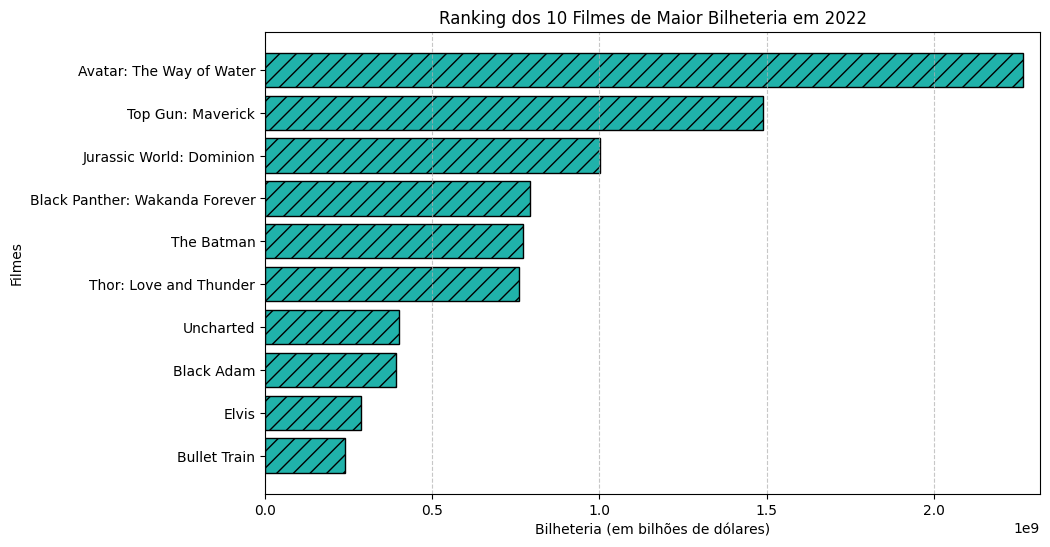

In [43]:
# PROJETO DE VISUALIZAÇÃO 1:
# Filtrar apenas os filmes de 2022
df_2022 = df[df["Year"] == 2022].copy()

# Converter a coluna Income para numérico
df_2022["Income"] = df_2022["Income"].replace({"[\$,]": ""}, regex=True).apply(pd.to_numeric, errors='coerce')

# Converter a coluna Rating para numérico
df_2022["Rating"] = df_2022["Rating"].apply(pd.to_numeric, errors='coerce')

# Remover valores nulos e ordenar do maior para o menor
df_2022 = df_2022.dropna(subset=["Income"]).sort_values(by="Income", ascending=False)

# Selecionar os 10 filmes de maior bilheteria
top_movies = df_2022.head(10)[["Title", "Income", "Rating"]]

# Reverter a ordem para que o maior fique no topo
top_movies = top_movies.iloc[::-1]

# Definir cores do rating baseado na legenda do gráfico desenhado
def rating_color(rating):
    if rating >= 7.5:
        return "black"
    elif rating >= 5.0:
        return "blue"
    elif rating >= 2.5:
        return "#20B2AA"  # Verde-água
    else:
        return "lightblue"

top_movies["Rating_Color"] = top_movies["Rating"].apply(rating_color)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Barras principais em verde-água
ax.barh(top_movies["Title"], top_movies["Income"], color="#20B2AA", edgecolor="black", hatch="//")

# Adicionar indicadores de rating como pequenos retângulos ao lado das barras
for index, row in top_movies.iterrows():
    ax.barh(row["Title"], width=0.5, left=row["Income"] + 50_000_000, color=row["Rating_Color"], height=0.3)

# Ajustes visuais
plt.xlabel("Bilheteria (em bilhões de dólares)")
plt.ylabel("Filmes")
plt.title("Ranking dos 10 Filmes de Maior Bilheteria em 2022")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

## **Projeto de Visualização 2: Listagem dos filmes mais lucrativos por ano de 2003 a 2022**

In [44]:
# PROJETO DE VISUALIZAÇÃO 2: